# Importing Libraries

In [59]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Reading and copying data

#### These datasets relate to the red wine in the eye of Portuguese "Vinho Verde". Only those with physicochemical (inputs) and sensory (output) prices can be used (eg no data on wines, wine sales, etc.).


#### Input Variables (Obtained from physicochemical tests):
#### 1 - fixed acidity
#### 2 - volatile acidity
#### 3 - citric acid
#### 4 - residual sugar
#### 5 - chlorides
#### 6 - free sulfur dioxide
#### 7 - total sulfur dioxide
#### 8 - density
#### 9 - pH
#### 10 - sulphates
#### 11 - alcohol
#### Output (Dependent Variable)
#### 12 - quality (0 to 10 values)

In [60]:
data=pd.read_csv('winequality-red.csv')
data_copy=data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory Data Analysis

In [61]:
data.shape

(1599, 12)

In [62]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [64]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Drawing a Correlation Matrix

<AxesSubplot:>

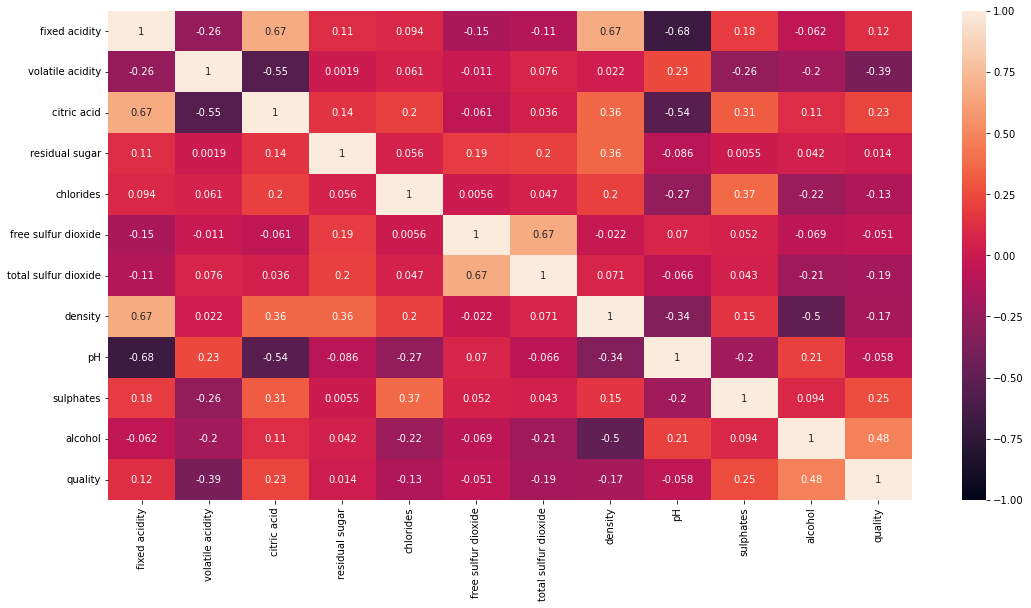

In [65]:
corr=data.corr()
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),xticklabels=corr.columns,yticklabels=corr.columns,vmin=-1,vmax=1,annot=True)

### Information on how data in each feature is distributed in our dataset, as well as central trends such as mean, median, and mode.

In [66]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()
num_feat = data.select_dtypes(exclude = 'object')

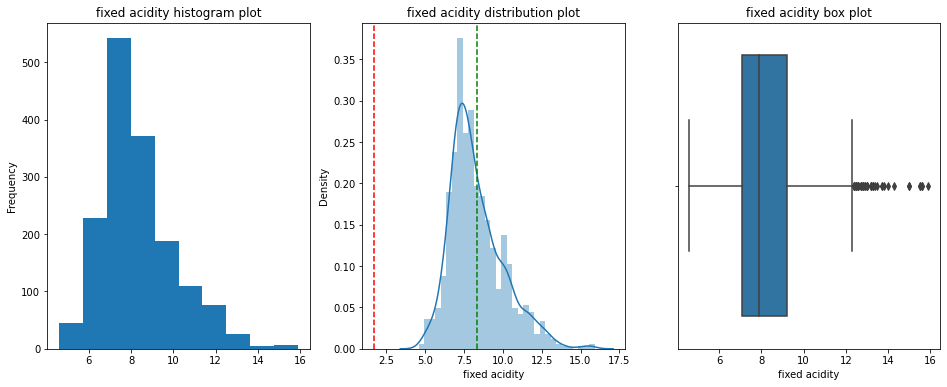

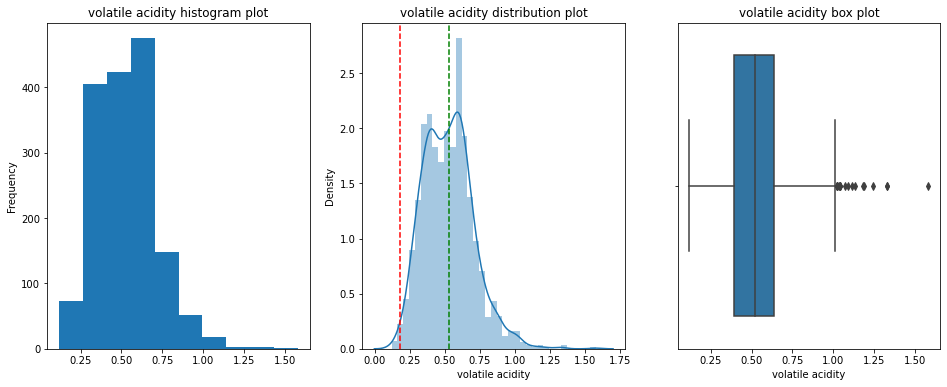

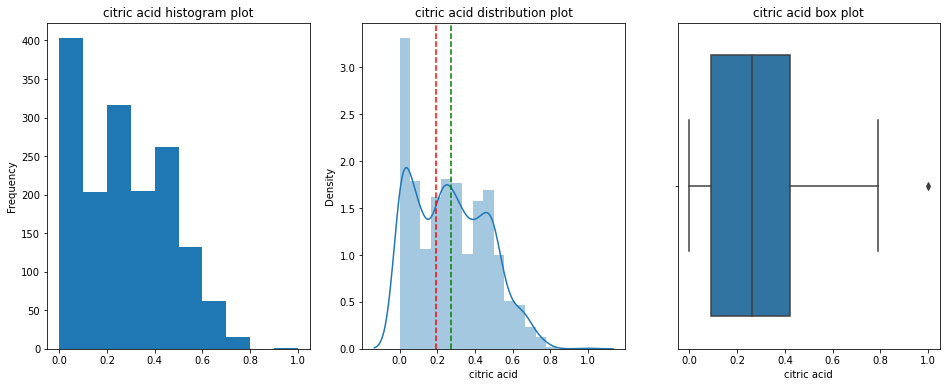

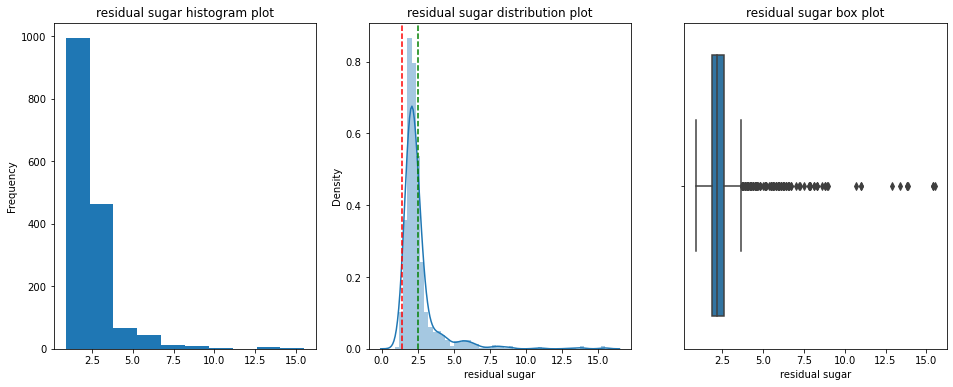

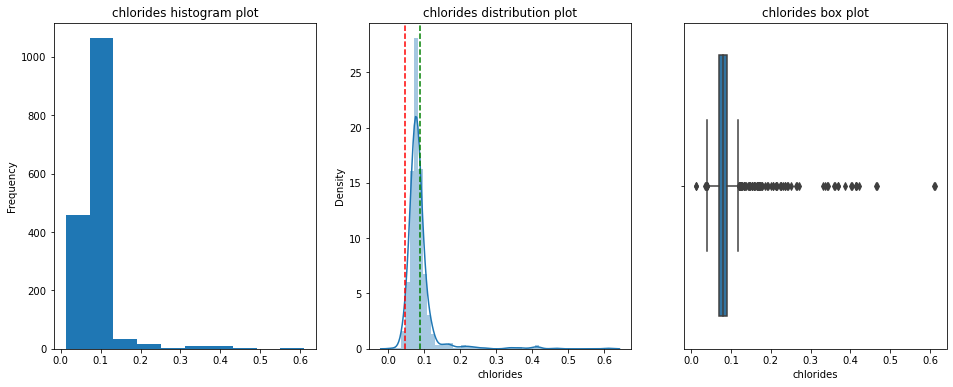

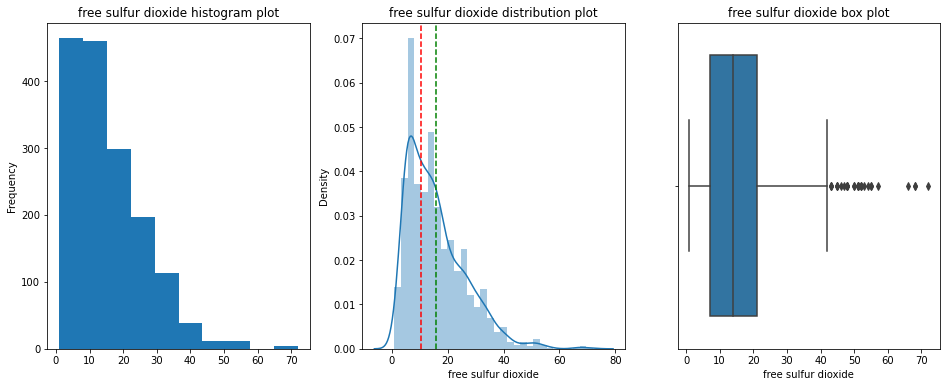

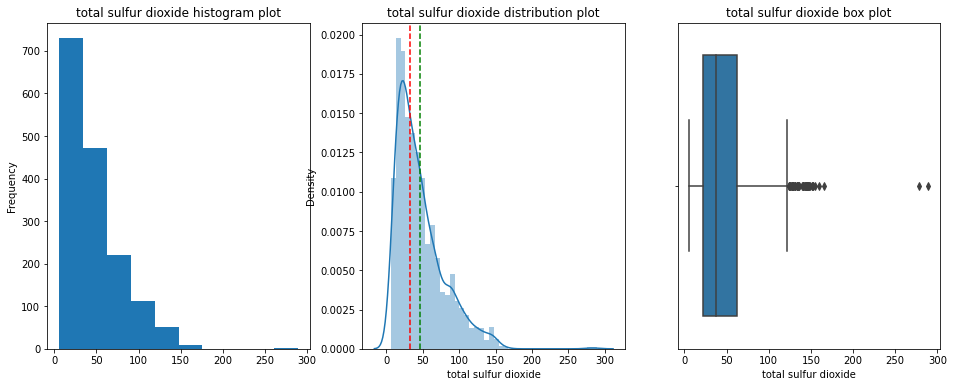

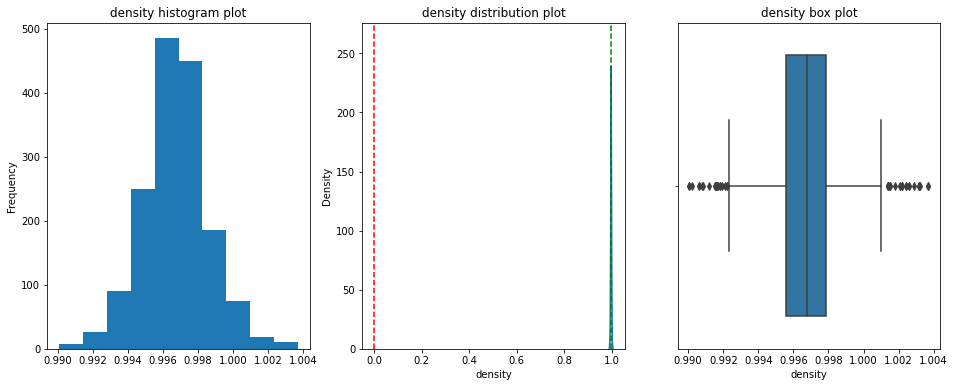

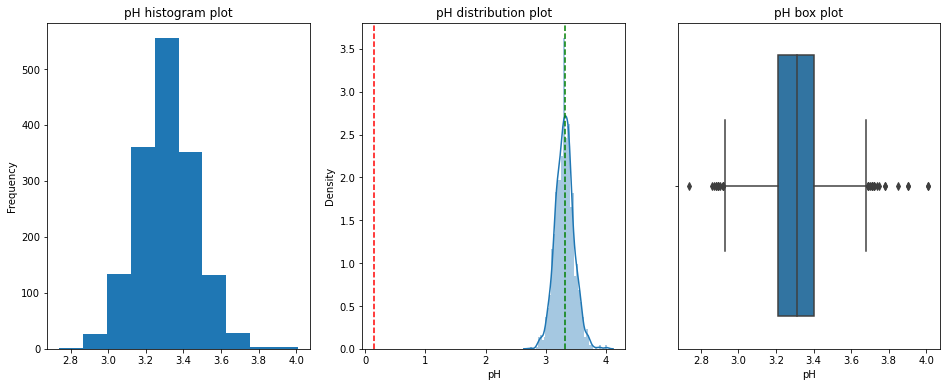

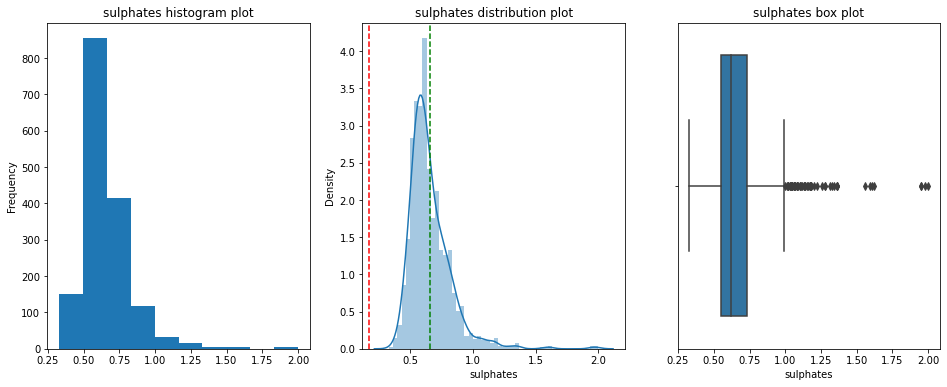

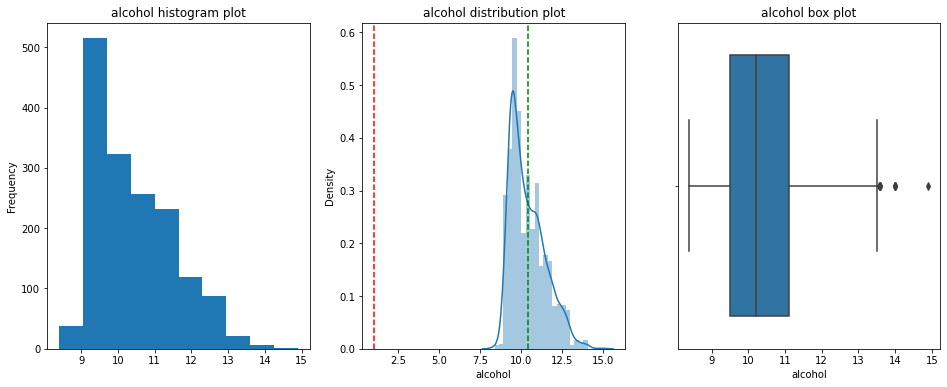

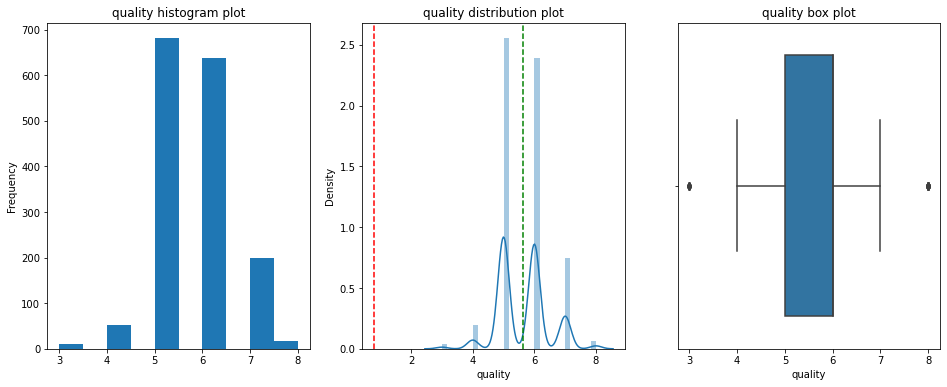

In [67]:
for i in num_feat.columns:
    feat_plot(num_feat[i])

###  How many samples of what quality are in our data?

In [68]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '5'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '4'),
  Text(4, 0, '8'),
  Text(5, 0, '3')])

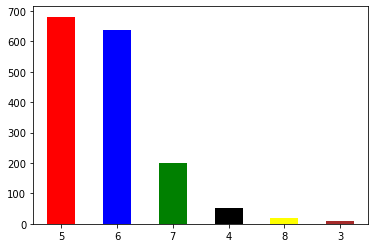

In [69]:
data['quality'].value_counts().plot(kind="bar",color=["red", "blue","green","black","yellow","brown"]);
plt.xticks(rotation=0)

###  Although the variable quality takes values ​​between 0 and 10 in the data set, there are no examples for quality values ​​of 0,1,2,9 and 10. When a regression approach is applied, it is thought that it will not yield successful results when estimating in real life, since the necessary learning for these quality values ​​cannot be obtained from our data.

# Data Manipulation

In [70]:
# checking the missing data
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### We have no missing data and no categorical values. All data consists of numerical values. Therefore, there is no need to create a dummy value.

In [71]:
y=data['quality'].values
X=data.drop(["quality"],axis=1)

### Label values ( Dependent variable)

In [72]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

### Matrix that we are going to use as a Feature ( Independent values)

In [73]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [75]:
list_metrics=[]

# Modeling with Predictive Analytics Algorithms

## Lineer Regression

### Dataset has been splitted up two parts as train and test set

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=63)

### Train linear regression and calculate metrics by making the trained model predict

In [77]:
lm=LinearRegression()
lm.fit(X_train,Y_train)
predictions=lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('R_2:', metrics.r2_score(Y_test, predictions))
print('Modelin test setindeki performansı :', lm.score(X_test,Y_test))
lineer_metrics={}
lineer_metrics['name']='Lineer Regresyon'
lineer_metrics['MAE']=metrics.mean_absolute_error(Y_test, predictions)
lineer_metrics['MSE']=metrics.mean_squared_error(Y_test, predictions)
lineer_metrics['RMSE']=np.sqrt(metrics.mean_squared_error(Y_test, predictions))
lineer_metrics['R_2']= metrics.r2_score(Y_test, predictions)
list_metrics.append(lineer_metrics)

MAE: 0.5058149053209454
MSE: 0.4335460098873282
RMSE: 0.6584421082276924
R_2: 0.36902014792048765
Modelin test setindeki performansı : 0.36902014792048765


### To fit the model to be used in reality with all the data. Coefficients to be used in reality

In [78]:
lm.fit(X,y)
lm.coef_

array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
       -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
       -4.13653144e-01,  9.16334413e-01,  2.76197699e-01])

## Decision Tree Regression

### Dataset has been splitted up two parts as train and test set

In [79]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

### By assigning 1000 values ​​between 0 and 1 to the alpha penalty parameters, the alpha value that gives a min Validation Error is sought. During this process, cross validation is done. Evaluation criteria neg_mean_squared_error. The results are thrown into a dataframe.

In [80]:
alphas = np.linspace(0,1,num=1000)
CVErrors=[]
for i in alphas:
    regressor = DecisionTreeRegressor(ccp_alpha=i)
    Errors=cross_val_score(regressor,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
    CVErrors.append([i,-1*np.mean(Errors)])
    df = pd.DataFrame(CVErrors,columns=['alpha','Validation Error'])

### The validation errors in the dataframe are listed and the alpha value with the lowest validation error is 0.005005

In [81]:
kfoldCV_by_alpha=df.sort_values(by=['Validation Error'],ascending=True)
kfoldCV_by_alpha

,alpha,Validation Error
5,0.005005,0.472721
4,0.004004,0.475122
3,0.003003,0.481400
10,0.010010,0.483794
7,0.007007,0.484722
...,...,...
999,1.000000,0.644176
125,0.125125,0.644714
124,0.124124,0.644714
123,0.123123,0.644714


###  According to the selected alpha value, the decision tree regressor is fitted and predictions are made. Then the relevant metrics are calculated.

In [82]:
regressor = DecisionTreeRegressor(ccp_alpha=0.0050005)  
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R_2:', metrics.r2_score(y_test, y_pred))
decision_metrics={}
decision_metrics['name']='Decision Tree'
decision_metrics['MAE']=metrics.mean_absolute_error(y_test, y_pred)
decision_metrics['MSE']=metrics.mean_squared_error(y_test, y_pred)
decision_metrics['RMSE']=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
decision_metrics['R_2']= metrics.r2_score(y_test, y_pred)
list_metrics.append(decision_metrics)

MAE: 0.5628180078851652
MSE: 0.5624913284566708
RMSE: 0.7499942189488336
R_2: 0.1813540267206314


## Random Forest Regression

### After dividing the data set as a train test split, the standardscaler was called to standardize the data from the preprocessing library, and a scaler instance was trained after it was created. Afterwards, the test and train sets were standardized separately so that the information in the test set would not leak into the train set.

In [83]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

### An example was created from RandomForestRegressor. Then a params variable consisting of different max_features and n_estimators was created. A grid has been created. A pipe line is sent because we do not want the training set and validation set to be mixed while doing grid search. First, the data will be standardized, then randomforest regressors will be made sequentially with the variables in the params. By cross-validation, the parameters that give the best neg_mean_squared_error as scoring will be taken and it will be printed by throwing it into the best_params_ variable.


In [84]:
regressor=RandomForestRegressor(random_state=63)

n_estimators = [100,200,300,400,500,600]

max_features = [3,4,5,6,7]

params = {
 'Regressor__n_estimators': n_estimators,
 'Regressor__max_features': max_features,
 }

pipe = Pipeline([('scaler',preprocessing.StandardScaler()),('Regressor', regressor)])


clf_grid = GridSearchCV(estimator = pipe, param_grid = params, 
                                cv = 5, verbose=2, scoring='neg_mean_squared_error',n_jobs = -1)

clf_grid.fit(X_train, y_train)

print(clf_grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'Regressor__max_features': 4, 'Regressor__n_estimators': 300}


### By taking the n_estimator and max_features values ​​from the best_params_ variable above, regression will be trained, predictions will be made and metrics will be checked.¶

In [85]:
clf=RandomForestRegressor(random_state=63,n_estimators=300,max_features=4)
clf.fit(X_trainStandard,y_train)
y_pred=clf.predict(X_testStandard)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R_2:', metrics.r2_score(y_test, y_pred))
rf_metrics={}
rf_metrics['name']='Random Forest'
rf_metrics['MAE']=metrics.mean_absolute_error(y_test, y_pred)
rf_metrics['MSE']=metrics.mean_squared_error(y_test, y_pred)
rf_metrics['RMSE']=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rf_metrics['R_2']=metrics.r2_score(y_test, y_pred)
list_metrics.append(rf_metrics)

MAE: 0.41961458333333324
MSE: 0.35510309027777776
RMSE: 0.5959052695502681
R_2: 0.48318542838237544


## XGBoost Regression

### After dividing the data set as a train test split, the standardscaler was called to standardize the data from the preprocessing library, and a scaler instance was trained after it was created. Afterwards, the test and train sets were standardized separately so that the information in the test set would not leak into the train set.

In [86]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testtransformed = scaler.transform(X_test)

### An example was created from XGBoost Regression. Afterwards, a params variable consisting of different learning_rate and n_estimators was created. A grid has been created. A pipe line is sent because we don't want the training set and validation set to get mixed up while doing grid search. First, the data will be standardized, then XGBoost Regression will be done sequentially with the variables in the params. By cross-validation, the parameters that give the best neg_mean_squared_error as scoring will be taken and it will be printed by throwing it into the best_params_ variable.

In [87]:
model=XGBRegressor()
n_estimators = [100,1000,5000,10000]

learning_rate = [1,0.1,0.01,0.001]

params = {
 'Regressor__n_estimators': n_estimators,
 'Regressor__learning_rate': learning_rate,
 }

pipe = Pipeline([('scaler',preprocessing.StandardScaler()),('Regressor', model)])

boost_grid = GridSearchCV(estimator = pipe, param_grid = params, 
                                cv = 5, verbose=2, scoring='neg_mean_squared_error',n_jobs = -1)

boost_grid.fit(X_train, y_train)

print(boost_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'Regressor__learning_rate': 0.01, 'Regressor__n_estimators': 5000}


### By taking the n_estimator and learning_rate values ​​from the best_params_ variable above, the regression will be trained, the prediction will be made and the metrics calculated.

In [88]:
model=GradientBoostingRegressor(n_estimators=5000,max_depth=1,learning_rate=0.01)
model.fit(X_trainStandard,y_train)
y_pred=model.predict(X_testtransformed)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R_2:', metrics.r2_score(y_test, y_pred))
xg_metrics={}
xg_metrics['name']='XGBoost'
xg_metrics['MAE']=metrics.mean_absolute_error(y_test, y_pred)
xg_metrics['MSE']=metrics.mean_squared_error(y_test, y_pred)
xg_metrics['RMSE']= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
xg_metrics['R_2']= metrics.r2_score(y_test, y_pred)
list_metrics.append(xg_metrics)

MAE: 0.4880440859570642
MSE: 0.4093722388748498
RMSE: 0.639822036878107
R_2: 0.4042024863800705


## Comparison of results

In [89]:
list_metrics

[{'name': 'Lineer Regresyon',
  'MAE': 0.5058149053209454,
  'MSE': 0.4335460098873282,
  'RMSE': 0.6584421082276924,
  'R_2': 0.36902014792048765},
 {'name': 'Decision Tree',
  'MAE': 0.5628180078851652,
  'MSE': 0.5624913284566708,
  'RMSE': 0.7499942189488336,
  'R_2': 0.1813540267206314},
 {'name': 'Random Forest',
  'MAE': 0.41961458333333324,
  'MSE': 0.35510309027777776,
  'RMSE': 0.5959052695502681,
  'R_2': 0.48318542838237544},
 {'name': 'XGBoost',
  'MAE': 0.4880440859570642,
  'MSE': 0.4093722388748498,
  'RMSE': 0.639822036878107,
  'R_2': 0.4042024863800705}]

In [90]:
metrics=pd.DataFrame(list_metrics)

In [91]:
metrics

,name,MAE,MSE,RMSE,R_2
0,Lineer Regresyon,0.505815,0.433546,0.658442,0.369020
1,Decision Tree,0.562818,0.562491,0.749994,0.181354
2,Random Forest,0.419615,0.355103,0.595905,0.483185
3,XGBoost,0.488044,0.409372,0.639822,0.404202


## As you can see, we get the lowest errors and the highest r2 score results with Random Forrest Regressor.

## Let's examine feature importance in our Random Forest Regression. We are doing the regression again.

In [92]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [93]:
clf=RandomForestRegressor(random_state=63,n_estimators=300,max_features=4)
clf.fit(X_trainStandard,y_train)

RandomForestRegressor(max_features=4, n_estimators=300, random_state=63)

### Feature Importance

In [94]:
clf.feature_importances_

array([0.06051317, 0.11672224, 0.06377315, 0.05800202, 0.07457193,
       0.05083936, 0.081645  , 0.08416711, 0.05764603, 0.13889526,
       0.21322474])

### Feature Importance array matched with columns

In [95]:
feature_dict = dict(zip(X.columns, list(clf.feature_importances_)))
feature_dict

{'fixed acidity': 0.06051316574790184,
 'volatile acidity': 0.11672224302986728,
 'citric acid': 0.06377314806777502,
 'residual sugar': 0.05800201532806,
 'chlorides': 0.07457192898895999,
 'free sulfur dioxide': 0.05083935576642283,
 'total sulfur dioxide': 0.08164500024584674,
 'density': 0.08416710991559798,
 'pH': 0.05764603048541947,
 'sulphates': 0.13889525815850715,
 'alcohol': 0.21322474426564172}

### As can be seen, according to the results we obtained from our data set, the 3 most important physicochemical properties that determine the quality value of a wine were determined as alcohol, sulphates and volatile acidity, respectively.

###  Although the variable quality takes values ​​between 0 and 10 in our data, there are no samples for quality values ​​of 0,1,2,9 and 10. When a regression approach is applied, it is thought that it will not yield successful results in reality, since it is thought that the necessary learning for these quality values ​​cannot be obtained from the data. A classification algorithm can be applied by making a slight change in the data set. For this, the samples with a quality value of 6 and higher are 1, ie high quality; Samples with a quality value less than 6 will be assigned 0, ie low quality values. With the classification methods, predictions will be made with the models to be established according to whether the wine is high or low quality, that is, 1 or 0.

### Data has been read again.

In [96]:
data=pd.read_csv('winequality-red.csv')
data_copy=data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Label (dependant) and feature (independent variable) values ​​were assigned.

In [97]:
y=data['quality'].values
X=data.drop(["quality"],axis=1)

### For samples with a Quality value of 6 or higher, 1, that is, high quality; Samples with a Quality value less than 6 were assigned values ​​of 0, that is, poor quality.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '5'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '4'),
  Text(4, 0, '8'),
  Text(5, 0, '3')])

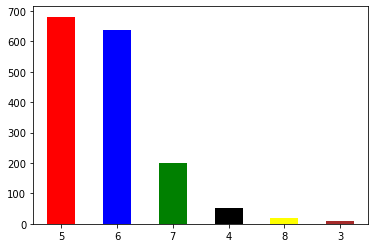

In [98]:
data['quality'].value_counts().plot(kind="bar",color=["red", "blue","green","black","yellow","brown"]);
plt.xticks(rotation=0)

In [99]:
for i in range(len(y)):
    if y[i] >= 6:
        y[i]=1
    else:
        y[i]=0
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [100]:
len(y)

1599

In [101]:
y.sum()

855

In [102]:
len(y)-y.sum()

744

### For a total of 1599 samples, it was determined that there were 855 high-quality 744 low-quality data points. The distribution of 1 and 0 values ​​is almost equal.

In [103]:
list_m=[]

## Logistic Regression

### The data was divided into train and test.

In [104]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

### An instance named pipe was created from the Pipeline object. Afterwards, a search_space variable consisting of different c parameter and penalty values ​​was created. A grid has been created. A pipe line is sent because we do not want the training set and validation set to interfere with each other while doing grid search. First, the data will be standardized, then Logistic Regression will be done sequentially with the variables in the search_space. By cross-Validation, the parameters that give the best results as scoring will be taken and it will be printed by throwing them into the best_params_ variable.

In [105]:
pipe = Pipeline([('Classifier', LogisticRegression())])


search_space = [{'Classifier': [LogisticRegression(solver='liblinear')],
                 'Classifier__C': np.logspace(-4, 4, 30),
                 'Classifier__penalty':['l1','l2']}]

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   LogisticRegression(C=2.592943797404667, solver='liblinear'))],
 'verbose': False,
 'Classifier': LogisticRegression(C=2.592943797404667, solver='liblinear'),
 'Classifier__C': 2.592943797404667,
 'Classifier__class_weight': None,
 'Classifier__dual': False,
 'Classifier__fit_intercept': True,
 'Classifier__intercept_scaling': 1,
 'Classifier__l1_ratio': None,
 'Classifier__max_iter': 100,
 'Classifier__multi_class': 'auto',
 'Classifier__n_jobs': None,
 'Classifier__penalty': 'l2',
 'Classifier__random_state': None,
 'Classifier__solver': 'liblinear',
 'Classifier__tol': 0.0001,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [106]:
best_model.best_params_

{'Classifier': LogisticRegression(C=2.592943797404667, solver='liblinear'),
 'Classifier__C': 2.592943797404667,
 'Classifier__penalty': 'l2'}

### The model was trained with the best parameters and the relevant metrics were created by making predictions.

In [107]:
model=LogisticRegression(C=2.592943797404667,penalty='l2',solver='liblinear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_log={}
dic_log['name']='Logistic'
dic_log['Accuracy']=accuracy_score(y_test, y_pred)
list_m.append(dic_log)

Accuracy: 0.759375


## KNN

### The data was divided into train and test.

In [108]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

### An instance named pipe was created from the Pipeline object. Then a search_space variable consisting of different n_neighbors values ​​is created. A grid has been created. A pipe line is sent because we do not want the training set and validation set to interfere with each other while doing grid search. First, the data will be standardized, then the KNeighborsClassifier will be made sequentially with the variables in the search_space. By cross-Validation, the parameters that give the best results as scoring will be taken and it will be printed by throwing them into the best_params_ variable.

In [109]:
pipe = Pipeline([('Classifier', KNeighborsClassifier())])


search_space = [{'Classifier': [KNeighborsClassifier()],
                 'Classifier__n_neighbors':[2,3,4,5,6]}]


clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'Classifier': KNeighborsClassifier(n_neighbors=3),
 'Classifier__algorithm': 'auto',
 'Classifier__leaf_size': 30,
 'Classifier__metric': 'minkowski',
 'Classifier__metric_params': None,
 'Classifier__n_jobs': None,
 'Classifier__n_neighbors': 3,
 'Classifier__p': 2,
 'Classifier__weights': 'uniform'}

In [110]:
best_model.best_params_

{'Classifier': KNeighborsClassifier(n_neighbors=3),
 'Classifier__n_neighbors': 3}

### The model was trained with the best parameters and the relevant metrics were created by making predictions.

In [111]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_knn={}
dic_knn['name']='KNN'
dic_knn['Accuracy']=accuracy_score(y_test, y_pred)
list_m.append(dic_knn)

Accuracy: 0.675


## Random Forest Classifier

### The data was divided into train and test.

In [112]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

### An instance named pipe was created from the Pipeline object. Afterwards, a search_space variable consisting of different n_estimators and max_features values ​​was created. A grid has been created. A pipe line is sent because we do not want the training set and validation set to interfere with each other while doing grid search. First, the data will be standardized, then RandomForestClassifier will be made sequentially with the variables in the search_space. By cross-Validation, the parameters that give the best results as scoring will be taken and it will be printed by throwing them into the best_params_ variable.


In [113]:
pipe = Pipeline([('Classifier', RandomForestClassifier())])


search_space = [{'Classifier': [RandomForestClassifier(random_state=63)],
                 'Classifier__n_estimators': [100, 200,300,400,500,600],
                 'Classifier__max_features': [3,4,5,6,7]}]


clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   RandomForestClassifier(max_features=3, n_estimators=300, random_state=63))],
 'verbose': False,
 'Classifier': RandomForestClassifier(max_features=3, n_estimators=300, random_state=63),
 'Classifier__bootstrap': True,
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': None,
 'Classifier__max_features': 3,
 'Classifier__max_leaf_nodes': None,
 'Classifier__max_samples': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_impurity_split': None,
 'Classifier__min_samples_leaf': 1,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__n_estimators': 300,
 'Classifier__n_jobs': None,
 'Classifier__oob_score': False,
 'Classifier__random_state': 63,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [114]:
best_model.best_params_

{'Classifier': RandomForestClassifier(max_features=3, n_estimators=300, random_state=63),
 'Classifier__max_features': 3,
 'Classifier__n_estimators': 300}

### The model was trained with the best parameters and the relevant metrics were created by making predictions.

In [115]:
clf=RandomForestClassifier(random_state=63,n_estimators=300,max_features=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_rnd={}
dic_rnd['name']='Random Forest'
dic_rnd['Accuracy']=accuracy_score(y_test, y_pred)
list_m.append(dic_rnd)

Accuracy: 0.834375


## Support Vector

### After dividing the data set as a train test split, the standard scaler was called to standardize the data in the preprocessing library, and after creating an instance called scaler, it was trained with train. Afterwards, the test and train sets were standardized separately so that the information in the test set would not leak into the train set. In addition, the stratify feature was synchronized with y so that the number of samples in the train and test were at the same rate.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63,stratify=y)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

### A pipe instance was created from the Pipeline library. In this way, the data will be standardized first and then processed in the Support Vector Classifier. Afterwards, Hyper Parameter Tuning is performed and the parameters to be tested are sent to a variable called tuned_parameters. The parameters with the best accuracy score were found.

In [117]:
pipe=Pipeline([('scaler',preprocessing.StandardScaler()),('Classifier',SVC())])
tuned_parameters = [{'Classifier__kernel': ['rbf'], 
                     'Classifier__gamma': [1,0.1,0.01,0.001],
                     'Classifier__C': [1, 10, 100, 1000]},
                    {'Classifier__kernel': ['linear'], 'Classifier__C': [1, 10, 100, 1000]},
                   {'Classifier__kernel':['poly'], 'Classifier__C':[1, 10, 100, 1000]}]
grid = GridSearchCV(pipe,tuned_parameters,refit=True,verbose=2,scoring='accuracy')

grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END Classifier__C=1, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=1, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=1, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.1s
[CV] END Classifier__C=1, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=1, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=1, Classifier__gamma=0.1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=1, Classifier__gamma=0.1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=1, Classifier__gamma=0.1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=1, Classifier__gamma=0.1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=1, Classifier__gamma=0.1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=1, Cl

[CV] END ........Classifier__C=10, Classifier__kernel=linear; total time=   0.0s
[CV] END .......Classifier__C=100, Classifier__kernel=linear; total time=   0.7s
[CV] END .......Classifier__C=100, Classifier__kernel=linear; total time=   1.3s
[CV] END .......Classifier__C=100, Classifier__kernel=linear; total time=   1.0s
[CV] END .......Classifier__C=100, Classifier__kernel=linear; total time=   0.7s
[CV] END .......Classifier__C=100, Classifier__kernel=linear; total time=   1.0s
[CV] END ......Classifier__C=1000, Classifier__kernel=linear; total time=   8.9s
[CV] END ......Classifier__C=1000, Classifier__kernel=linear; total time=   7.9s
[CV] END ......Classifier__C=1000, Classifier__kernel=linear; total time=   7.5s
[CV] END ......Classifier__C=1000, Classifier__kernel=linear; total time=   8.6s
[CV] END ......Classifier__C=1000, Classifier__kernel=linear; total time=  11.0s
[CV] END ...........Classifier__C=1, Classifier__kernel=poly; total time=   0.0s
[CV] END ...........Classifi

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('Classifier', SVC())]),
             param_grid=[{'Classifier__C': [1, 10, 100, 1000],
                          'Classifier__gamma': [1, 0.1, 0.01, 0.001],
                          'Classifier__kernel': ['rbf']},
                         {'Classifier__C': [1, 10, 100, 1000],
                          'Classifier__kernel': ['linear']},
                         {'Classifier__C': [1, 10, 100, 1000],
                          'Classifier__kernel': ['poly']}],
             scoring='accuracy', verbose=2)

In [118]:
print(grid.best_params_)

{'Classifier__C': 1, 'Classifier__gamma': 0.1, 'Classifier__kernel': 'rbf'}


### The model was trained with the best parameters and the relevant metrics were created by making predictions.

In [119]:
model = SVC(C=1,gamma=0.1,kernel='rbf')
model.fit(X_trainStandard,y_train)
predictions = model.predict(X_testStandard)
model.score(X_testStandard,y_test)
dic_svc={}
dic_svc['name']='SVC'
dic_svc['Accuracy']=accuracy_score(y_test, y_pred)
list_m.append(dic_svc)

In [120]:
list_m

[{'name': 'Logistic', 'Accuracy': 0.759375},
 {'name': 'KNN', 'Accuracy': 0.675},
 {'name': 'Random Forest', 'Accuracy': 0.834375},
 {'name': 'SVC', 'Accuracy': 0.478125}]

### All results are written to a list and then a DataFrame to be analyzed.
## Comparison of Results

In [121]:
results=pd.DataFrame(list_m)
results

,name,Accuracy
0,Logistic,0.759375
1,KNN,0.675000
2,Random Forest,0.834375
3,SVC,0.478125


## As you can see, when we make our data set suitable for the classification problem, we get the highest accuracy score with the Random Forest Classifier.

In [122]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [123]:
clf=RandomForestClassifier(random_state=63,n_estimators=300,max_features=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.834375


In [124]:
clf.feature_importances_

array([0.07109038, 0.10647257, 0.06432387, 0.05634524, 0.07473026,
       0.05934482, 0.10160661, 0.08936343, 0.06757888, 0.12349143,
       0.18565252])

In [125]:
feature_dict = dict(zip(X.columns, list(clf.feature_importances_)))
feature_dict

{'fixed acidity': 0.071090378113011,
 'volatile acidity': 0.10647256874114415,
 'citric acid': 0.0643238700364353,
 'residual sugar': 0.05634524419809959,
 'chlorides': 0.07473025616397695,
 'free sulfur dioxide': 0.05934481613912124,
 'total sulfur dioxide': 0.10160660908179396,
 'density': 0.08936342654729049,
 'pH': 0.06757888259507831,
 'sulphates': 0.12349143019021112,
 'alcohol': 0.1856525181938378}

### As can be seen, according to the results obtained when we make the classification, the 3 most important physicochemical features that determine the quality are alcohol, sulphates and volatile acidity, respectively.

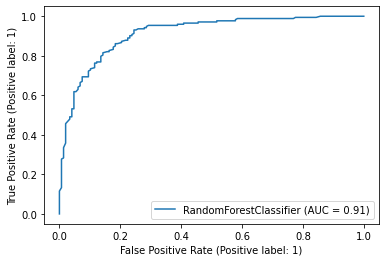

In [126]:
plot_roc_curve(clf, X_test, y_test)

In [127]:
print(confusion_matrix(y_test, y_pred))

[[117  30]
 [ 23 150]]


In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       147
           1       0.83      0.87      0.85       173

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



## As you can see, our AUC value is quite high at 91 percent. In addition, when we examine the confusion matrix, we see that we make consistent predictions. Our precision and recall values ​​support this result.